<a href="https://colab.research.google.com/github/dla9944/myPyCode/blob/main/DecisionTree_Progress_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 다양한 독립변수에 따른 샐러리(급여)에 관하여
# 분기별로 갈라지는 샐러리

In [156]:
# 필요한 라이브러리 호출

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tree

In [157]:
# 데이터 로드

salary = pd.read_csv('salary.csv')
salary

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [158]:
# 문제가 많은 데이터프레임
# 띄어쓰기 제거 skipinitialspace = True

salary = pd.read_csv('salary.csv', skipinitialspace = True)

In [159]:
# 데이터 확인중
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [160]:
salary.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [161]:
salary.describe() # 소수점 압축이 필요

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [162]:
# 결측치 확인
salary.isnull().sum() # 결측치 없음

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [163]:
pd.options.display.float_format = "{:.2f}".format
salary.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [164]:
# 범주형 변수 조회

salary.describe(include='O') # 총 8가지

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [165]:
# 데이터 전처리 시작

# salary 부터 시작

In [166]:
salary['salary']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 32561, dtype: object

In [167]:
salary.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [168]:
# 50K 초과시 1로 구분하기로 함
# map 사용

salary.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [169]:
# 불필요한 타자 소요는 복사 붙여넣기 사용
salary['salary'] = salary['salary'].map({'<=50K' : 0, '>50K' : 1})
salary['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [170]:
# salary 갯수 확인
salary['salary'].value_counts() # 1/4정도 되는 크기

0    24720
1     7841
Name: salary, dtype: int64

In [171]:
salary.info() # 전체 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [172]:
salary['salary'].value_counts() / len(salary['salary'])

0   0.76
1   0.24
Name: salary, dtype: float64

In [173]:
# object들이 모인 list 저장. column으로 사용할 예정
obj_list = salary.describe(include='O').columns
obj_list

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [174]:
# nunique()로 고유값들의 수를 계산
# feature들이 얼마나 value들이 다양한 지 계산하는 함수 제작

for o in obj_list:
  print(o, salary[o].nunique())
  # sex가 최소로 2종류, native-country는 42개 까지 존재

workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42


In [175]:
# education 범주 전처리
# 고유값들 확인
salary.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [176]:
# education-num과의 관계 조사
salary['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64

In [177]:
# 일치여부 확인

for n in range(1, salary.education.nunique()+1):
  print(f'  {n}')
  print(salary[salary['education-num'] == n]['education'].unique())

  1
['Preschool']
  2
['1st-4th']
  3
['5th-6th']
  4
['7th-8th']
  5
['9th']
  6
['10th']
  7
['11th']
  8
['12th']
  9
['HS-grad']
  10
['Some-college']
  11
['Assoc-voc']
  12
['Assoc-acdm']
  13
['Bachelors']
  14
['Masters']
  15
['Prof-school']
  16
['Doctorate']


In [178]:
# education & education-num 일치
#삭제

In [179]:
salary.drop('education', axis = 1, inplace = True)

In [180]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [181]:
# native-country 전처리
salary['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [182]:
# salary 별로 국가를 비율로 계산하여, 순서형 변수로 바꿀 예정
salary.groupby('native-country')['salary']
salary

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [183]:
# native-country를 salary별로 묶은 데이터를 평균(0~1 둘중 하나의 비율)
# 로 바꿔서 50K 초과 임금소유자의 비율을 계산함

salary.groupby('native-country')['salary'].mean() # ? 국가는 확인불가

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [184]:
# 오름차순으로 정렬
salary.groupby('native-country')['salary'].mean().sort_values(ascending=False)

native-country
Iran                         0.42
France                       0.41
India                        0.40
Taiwan                       0.39
Japan                        0.39
Yugoslavia                   0.38
Cambodia                     0.37
Italy                        0.34
England                      0.33
Canada                       0.32
Germany                      0.32
Philippines                  0.31
Hong                         0.30
Greece                       0.28
China                        0.27
Cuba                         0.26
?                            0.25
Scotland                     0.25
United-States                0.25
Hungary                      0.23
Ireland                      0.21
South                        0.20
Poland                       0.20
Thailand                     0.17
Ecuador                      0.14
Jamaica                      0.12
Laos                         0.11
Portugal                     0.11
Trinadad&Tobago              0.11

In [185]:
country_group = salary.groupby('native-country').mean()['salary']

country_group

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [186]:
country_group.index

Index(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France',
       'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands',
       'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'],
      dtype='object', name='native-country')

In [187]:
# country_group을 merge로 병합

salary = salary.merge(
    country_group, left_on = 'native-country', right_index = True, how='left')
salary

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_x,salary_y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.25
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.25
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.25
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.25
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.25
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.25
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.25
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.25


In [188]:
# 범주형 변수 전처리 정리

country_group

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [189]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education-num   32561 non-null  int64  
 4   marital-status  32561 non-null  object 
 5   occupation      32561 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital-gain    32561 non-null  int64  
 10  capital-loss    32561 non-null  int64  
 11  hours-per-week  32561 non-null  int64  
 12  native-country  32561 non-null  object 
 13  salary_x        32561 non-null  int64  
 14  salary_y        32561 non-null  float64
dtypes: float64(1), int64(7), object(7)
memory usage: 3.7+ MB


In [190]:
# 컬럼 이름 재수정

salary = salary.rename(columns={'salary_x' : 'class', 'salary_y' :'country_class'})
salary

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,country_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.25
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.25
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.25
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.25
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.25
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.25
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.25
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.25


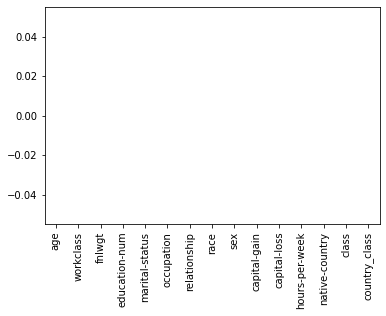

In [191]:
salary.isna().mean().plot(kind='bar')

In [192]:
# native-country는 country_class로 바꿨기 때문에 삭제
salary.drop('native-country', axis=1, inplace=True)

In [193]:
#country_class는 이제 불필요 해졌으므로 통일시킴

salary['country_class'].fillna(-99, inplace = True)
salary.isna().mean()

age              0.00
workclass        0.00
fnlwgt           0.00
education-num    0.00
marital-status   0.00
occupation       0.00
relationship     0.00
race             0.00
sex              0.00
capital-gain     0.00
capital-loss     0.00
hours-per-week   0.00
class            0.00
country_class    0.00
dtype: float64

In [194]:
# workclass 최빈값으로 통일

salary['workclass'].value_counts() / len(salary)

Private            0.70
Self-emp-not-inc   0.08
Local-gov          0.06
?                  0.06
State-gov          0.04
Self-emp-inc       0.03
Federal-gov        0.03
Without-pay        0.00
Never-worked       0.00
Name: workclass, dtype: float64

In [195]:
# private는 삭제

salary['workclass'].fillna('Private', inplace = True)
salary.isna().mean()

age              0.00
workclass        0.00
fnlwgt           0.00
education-num    0.00
marital-status   0.00
occupation       0.00
relationship     0.00
race             0.00
sex              0.00
capital-gain     0.00
capital-loss     0.00
hours-per-week   0.00
class            0.00
country_class    0.00
dtype: float64

In [196]:
# occupation은 Unknown으로 통일(무시)

salary['occupation'].fillna('Unknown', inplace = True)
salary.isna().mean()

age              0.00
workclass        0.00
fnlwgt           0.00
education-num    0.00
marital-status   0.00
occupation       0.00
relationship     0.00
race             0.00
sex              0.00
capital-gain     0.00
capital-loss     0.00
hours-per-week   0.00
class            0.00
country_class    0.00
dtype: float64

In [197]:
# salary 더미변수를 위한 컬럼 생성

salary_columns = salary.describe(include='O').columns
salary_columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [198]:
salary = pd.get_dummies(salary, columns = salary_columns, drop_first = True)
salary

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,country_class,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0.25,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0.25,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0.25,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0.25,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0.26,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0.25,0,0,...,0,0,0,0,1,0,0,0,1,0
32557,40,154374,9,0,0,40,1,0.25,0,0,...,0,0,0,0,0,0,0,0,1,1
32558,58,151910,9,0,0,40,0,0.25,0,0,...,0,0,0,1,0,0,0,0,1,0
32559,22,201490,9,0,0,20,0,0.25,0,0,...,0,0,1,0,0,0,0,0,1,1


In [199]:
# 데이터 재확인

salary.head() # 전처리 종료

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,country_class,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0.25,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0.25,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0.25,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0.25,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0.26,0,0,...,0,0,0,0,1,0,1,0,0,0


In [200]:
# 훈련셋 시험셋 분리 시작

from sklearn.model_selection import train_test_split

X = salary.drop('class', axis = 1)
y = salary['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [201]:
# 모델링 및 평가

from sklearn.tree import DecisionTreeClassifier

In [202]:
# 모델 (랜덤값도 지정)

model = DecisionTreeClassifier(random_state=10)

In [203]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [204]:
# 예측값
pred

array([0, 0, 0, ..., 0, 0, 0])

In [205]:
# 확률값
model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [206]:
# 정확도 점수 평가

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 80점

0.8077690772301551

In [207]:
# 혼동행렬 시작

from sklearn.metrics import confusion_matrix

In [208]:
confusion_matrix(y_test, pred)

array([[4313,  616],
       [ 636,  948]])

Text(69.0, 0.5, 'True/false')

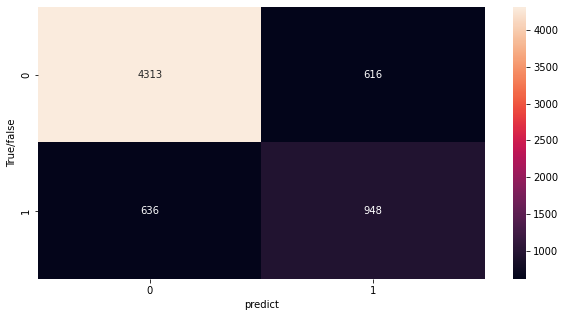

In [209]:
# heatmap으로 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt='.0f')
plt.xlabel('predict')
plt.ylabel('True/false')

In [210]:
# 트리 시각화

from sklearn.tree import plot_tree

[Text(0.4732142857142857, 0.9, 'marital-status_Married-civ-spouse <= 0.5\ngini = 0.365\nsamples = 26048\nvalue = [19791, 6257]'),
 Text(0.23214285714285715, 0.7, 'capital-gain <= 7073.5\ngini = 0.122\nsamples = 14085\nvalue = [13163, 922]'),
 Text(0.14285714285714285, 0.5, 'education-num <= 13.5\ngini = 0.093\nsamples = 13827\nvalue = [13153, 674]'),
 Text(0.07142857142857142, 0.3, 'capital-loss <= 2218.5\ngini = 0.071\nsamples = 13092\nvalue = [12608, 484]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'hours-per-week <= 43.5\ngini = 0.383\nsamples = 735\nvalue = [545, 190]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.32142857142857145, 0.5, 'age <= 20.5\ngini = 0.075\nsamples = 258\nvalue = [10, 248]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.35714285714285715, 0.3, 'fnlwgt <= 25115.5\ngini = 0.046\nsampl

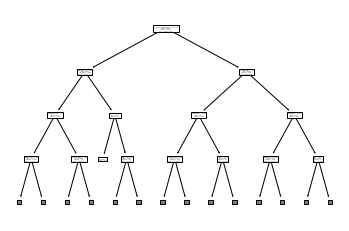

In [211]:
plot_tree(model, max_depth = 3, feature_names = X_train.columns)